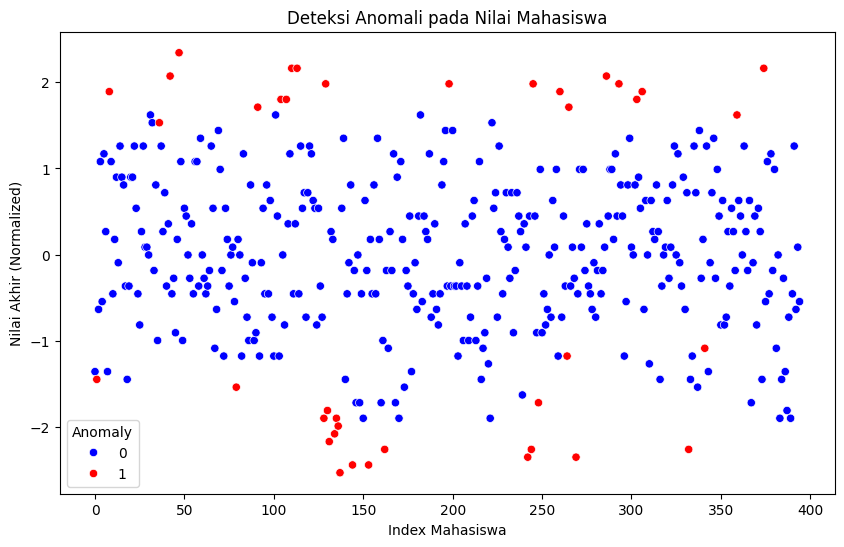

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk memuat data dari file CSV
def get_data(file_path):
    df = pd.read_csv(file_path)
    # Menambahkan kolom 'Nilai_Akhir'
    df['Nilai_Akhir'] = (df['G1'] + df['G2'] + df['G3']) / 3
    return df

def preprocess_data(df):
    # Normalisasi kolom nilai
    columns_to_normalize = ['G1', 'G2', 'G3', 'Nilai_Akhir']
    df[columns_to_normalize] = (df[columns_to_normalize] - df[columns_to_normalize].mean()) / df[columns_to_normalize].std()
    return df

def train_model(df):
    # Membuat model Isolation Forest
    # contamination=0.1 berarti kita memperkirakan bahwa 10% data adalah anomali
    # random_state=42 memastikan hasil yang dapat direproduksi
    model = IsolationForest(contamination=0.1, random_state=42)
    model.fit(df[['G1', 'G2', 'G3', 'Nilai_Akhir']])  # Fit model dengan semua kolom nilai
    return model

def predict_and_evaluate(model, df):
    features = ['G1', 'G2', 'G3', 'Nilai_Akhir']
    df['anomaly'] = model.predict(df[features])  # Prediksi anomali
    df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 adalah anomali
    return df

def visualize_results(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df.index, y='Nilai_Akhir', hue='anomaly', data=df, palette={0: 'blue', 1: 'red'})
    plt.title('Deteksi Anomali pada Nilai Mahasiswa')
    plt.xlabel('Index Mahasiswa')
    plt.ylabel('Nilai Akhir (Normalized)')
    plt.legend(title='Anomaly')
    plt.show()

# Main function
def main():
    file_path = 'student_data.csv'  # Path ke file CSV
    df = get_data(file_path)
    df = preprocess_data(df)
    df_train = df[['G1', 'G2', 'G3', 'Nilai_Akhir']]  # Data yang digunakan untuk training
    model = train_model(df_train)
    df['anomaly'] = model.predict(df_train)  # Pastikan prediksi menggunakan DataFrame dengan nama fitur yang sama
    df = predict_and_evaluate(model, df)
    visualize_results(df)

# Run the prototype
main()
